
### Exploratory Data Analysys
> (EDA)is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. [source : wiki]

With the help of Pandas we will be conducting basic EDA on the data provided; such as below


1. Data Description : 
    DataFrame's describe will reveal details about the data set such as count, mean , std, and few other; 

2. Missing values :
    This can be performed with the help of isnull().sum() or verifying the count from the describe feature. Please refer to the method 'null_check'
    
3. Data Type Analysis:

4. Outlier Analysis:
    Outlier is an abnormal observation that lies far away from other population. 
    > One way to perform the Outlier analysis is with the help of 'Standard Deviation' where anything that is not in the 3rd standard deviation is far from the population. Please refer to the 'count_outliers' method for the same and output image from 'box_plot_all' will depicts the view of those outliers.
    
      i.e. IQR InterQuartile Range where observations will be divided into four intervals and IQR = Q3-Q1; here outliers can be considered as  &lt; Q1-1.5*IQR or &gt; Q3+1.5*IQR where these are termed as lower whisker, upper whisker respectively.

5. Relationship Analysis:  correlation and Heatmap would produce the relationship between target and features.

## Solution


### Imports

In [1]:
# Imports for the Execution

from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import sys
import os
import math

import pandas as pd
import seaborn as sb
from scipy import stats
from scipy.stats import mode

from IPython.core.display import HTML

sb.set(style="darkgrid")
# Defining the display of generated image in the centre of the page.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#Scalar fit Transformation Class [note: will try using the mean and std for normalization]
scaler = StandardScaler()

### EDA Class

In [2]:
# EDA Class
'''
    (EDA)is an approach to analyzing data sets to summarize their 
    main characteristics, often with visual methods. 
    A statistical model can be used or not, but primarily EDA is for seeing 
    what the data can tell us beyond the formal modeling or hypothesis testing task.
'''
'''
    Random Color generation function used during plotting
'''


def get_color():
    rgd = np.random.rand(3, )
    # if self._verbose:
    #    print('Obtained Color RGD[{}]'.format(rgd))
    return rgd


# Takes Boolean as input and prints a 80 charecter line of '='
def print_line(verbose):
    if verbose:
        print("".center(80, '='))


class EDA:
    def __init__(self,
                 describe=False,
                 d_type=False,
                 null_check=False,
                 outlier=False,
                 verbose=False,
                 plot=False):
        self._describe = describe
        self._dtype = d_type
        self._null = null_check
        self._outlier = outlier
        self._verbose = verbose
        self._plot = plot
        if self._verbose:
            print(
                'EDA initialized and set to Describe [ {} ], DType Check [ {} ], Null Check [ {} ], Outlier Check [ {} ], Plot Graphs [ {} ]'
                .format(self._describe, self._dtype, self._null, self._outlier,
                        self._plot))

    def describe(self, file_name, y_col_name):
        try:
            if self._verbose:
                print_line(self._verbose)
                print('EDA for DataFrame : {}'.format(file_name))
                print_line(self._verbose)

            data_set = pd.read_csv(file_name)
            data_frame = pd.DataFrame(data_set)

            # DataFrame shape
            if self._verbose:
                print('Given Data Frame is of size  Rows[{}], columns[{}]'.
                      format(data_set.shape[0], data_set.shape[1]))

            # Describing the DataFrame
            if self._describe:
                print_line(self._verbose)
                print(data_set.describe())
                print_line(self._verbose)

            if self._null:
                null_list = self.check_null(data_set)
                print(
                    'No of Columns in DataFrame with Null values : {}'.format(
                        null_list.size))
                if self._verbose and null_list.size > 0:
                    print(
                        'Below are the Columns with Null Values being exist:')

            if self._dtype:
                print_line(self._verbose)
                print(
                    'Existence of Object or String type in the DataFrame : {}'.
                    format(self.find_scalar(data_set.dtypes)))

            # Scale Data
            data_set = self.scale_data(data_set)

            # Segregate the X, Ys for Further Analysis
            target_data = data_set[y_col_name]
            feature_data = data_set.drop(y_col_name, axis=1)

            if self._plot:
                # Box Plotting
                print_line(self._verbose)
                print(
                    'Visualization of Data - Plots[Box, Scatter, Correlation HeatMap, Correlation]'
                )
                self.check_outliers(feature_data)
                print_line(self._verbose)
                self.box_plot_all(feature_data)

                print_line(self._verbose)

                # Histogram
                self.dist_plot_all(feature_data, feature_data.columns)
                
                # Scatter Plot
                self.scatter_plot_all(target_data, feature_data,
                                      feature_data.columns)

                # Correlation HeatMap
                corr_matrix = data_frame.corr()
                print('Features Correlation with Target :')
                print_line(self._verbose)
                print(corr_matrix[y_col_name])
                print_line(self._verbose)
                print('Heat Map')
                sb.heatmap(corr_matrix, annot=True)

                # Pair Plot
                print(
                    'Pair Plot showing the correlation of {} to the target {}'.
                    format(feature_data.columns, y_col_name))
                print_line(self._verbose)
                sb.pairplot(data_frame,
                            kind="reg",
                            x_vars=feature_data.columns,
                            y_vars=[y_col_name],
                            diag_kind="kde")

        except AttributeError as err:
            print(
                'Unable to Process the DataFrame given [{}]'.format(file_name),
                err)

    '''
        
    '''

    def check_null(self, data_set):
        null_list = data_set.isnull().sum()
        return null_list[null_list != 0]

    '''
        Except Continuous everything is considered as non-scalar
    '''

    def find_scalar(self, type_arr):
        isScalar = False
        for ty in type_arr:
            if ty == 'object':
                isScalar = True
                break
        return isScalar

    def scale_data(self, data_set):
        return (data_set - data_set.mean()) / data_set.std()

    '''
        Box Plots everything into one Plot so the outliers can be viewed
    '''
    def box_plot_all(self, data_set):
        sb.boxplot(data=data_set, orient='h', palette="Set2")
        plt.show()

    '''
    '''
    def dist_plot_all(self, data_set, columns):
        for col in columns:
            plt.hist(data_set[col], 12, density=True, facecolor=get_color(), alpha=0.75)
            plt.xlabel(col)
            plt.title('Histogram of {}'.format(col))
            plt.show()
            

        
    '''
    Scatterplot All is used to plot x,y where x can be as many as; 
    and display the relationship between target and training features.
    '''

    def scatter_plot_all(self, y, data_set, columns):
        if columns.size == data_set.shape[1]:
            for col in columns:
                # print(bagdata[col])
                plt.scatter(y, data_set[col], color=get_color(), label=col)

        plt.xlabel("$X(0..n)$", fontsize=18)
        plt.ylabel("$Y$", rotation=0, fontsize=18)
        plt.legend()
        plt.title('Scatter Plot for Cost with Features')
        plt.show()

    '''
        Returns the columns which has the outliers in them
    '''

    def check_outliers(self, data_set):
        columns_with_outliers = []
        for i in range(data_set.shape[1]):
            outlier_cnt = len(
                self.detect_outliers(data_set[data_set.columns[i]]))
            if outlier_cnt > 0:
                columns_with_outliers.append(data_set.columns[i])
                if self._verbose:
                    print_line(self._verbose)
                    print(
                        'Existence of Outlier for the Column [{}] and the No. of Outliers present : {}'
                        .format(data_set.columns[i], outlier_cnt))
        return columns_with_outliers

    '''
        One way to perform the Outlier analysis is with the help of 'Standard Deviation' 
        where anything that is not in the 3rd standard deviation or 3 Sigma limits is far from the population.
        
        Let’s consider a manufacturing firm that runs a series of 10 tests 
        to determine whether there is a variation in the quality of its products. 
        The data points for the 10 tests are 8.4, 8.5, 9.1, 9.3, 9.4, 9.5, 9.7, 9.7, 9.9, and 9.9.

        First, calculate the average of the observed data. 
                (8.4 + 8.5 + 9.1 + 9.3 + 9.4 + 9.5 + 9.7 + 9.7 + 9.9 + 9.9) / 10 
                which equals 93.4 / 10 = 9.34.
        
        Second, calculate the variance of the set. 
            Variance is the spread between data points and is 
            calculated as the sum of the squares of the difference between each data point
            and the mean divided by the number of observations. 
            The first difference square will be calculated as (8.4 - 9.34)2 = 0.8836, 
            the second square of difference will be (8.5 - 9.34)2 = 0.7056, 
            third can be calculated as (9.1 - 9.34)2 = 0.0576, and so on. 
            The sum of the different squares of all 10 data points is 2.564. 
            The variance is, therefore, 2.564 / 10 = 0.2564.
        
        Third, calculate the standard deviation, 
            which is simply the square root of the variance. 
            So, standard deviation = √0.2564 = 0.5064.
        
        
        Fourth, calculate three-sigma, 
            which is three standard deviations above the mean. 
            In numerical format, this is (3 x 0.5064) + 9.34 = 10.9. 
            Since none of the data is at such a high point, 
            the manufacturing testing process has not yet reached three-sigma quality levels.
        
        source [https://www.investopedia.com/terms/t/three-sigma-limits.asp]
        
    '''

    def detect_outliers(self, data_set):
        std_ = np.std(data_set)
        mean_ = np.mean(data_set)
        std_3rd = std_ * 3
        outliers = []
        lower_whisker = mean_ - std_3rd
        upper_whisker = mean_ + std_3rd
        #print(lower_whisker, upper_whisker)
        # Generate outliers
        for outlier in data_set:
            if outlier > upper_whisker or outlier < lower_whisker:
                outliers.append(outlier)
        return outliers

### Gradient Descent Class - Parent Class

In [3]:
'''
Super class for the Gradient Descent Algorithm, which gets initialized with the parameters as

iterations - the number of iterations in order to obtain the Global minimum / J(0) / Minimized cost function
alpha - learning rate to follow while performing the descend
scale [defaulted to False], if set to True this will scale the X with the help of mean and standard deviation
verbose [defaulted to False], if set to True this will log details to the console.
'''


class BGDRegression:
    def __init__(self,
                 iterations,
                 alpha=0.001,
                 scale=False,
                 verbose=False,
                 plot=False):
        self._iterations = iterations
        self._theta = None
        self._cost_history = []
        self._alpha = alpha
        self._verbose = verbose

    '''
        Sets the model parametes[theta] using the gradient descent algorithm
        
        The goal of any Machine Learning Algorithm is to minimize the Cost Function {J(\theta)}.
    '''
    def generate_model(self, X, y):
        #print('Calling Generate Mode of {BGDRegression}')
        # Initialize Theta with the number of columns and inclusion of Theat_0
        try:
            # initialize to 0's [random value should be okay, but i am defaulting to 0]
            self._theta = np.matrix(np.zeros(X.shape[1]).T)
            for i in range(self._iterations):
                self._cost_history.append(
                    self.gradient_descent(X, y))
        except ValueError as err:
            print('Issue Occured while performing the Gradient Descent', err)
        return self._theta

    '''
        //TODO not required as there is already method exists
        y = h(x) or f(x) = x1.theta_1 + x2.theta_2 + .... x_m.theta_m
    '''
    def predict(self, X):
        return self.hypothesis(X)

    '''
        
    '''
    def gradient_descent(self, X, y):
        # Temp matrix to preserve theta during the iterations
        temp = np.matrix(np.zeros(self._theta.shape))
        features = int(self._theta.ravel().shape[1])

        #self._cost_history = np.zeros(self._iterations)
        error = self.loss_function(X, y)

        # For Every Feature iterate and calculate gradient with the new coefficent
        for j in range(features):
            # Calculate the graident
            gradient = np.multiply(error, X[:, j])

            # theta(j) = theta(j) - 1/m(alpha * sum of all (residuals))
            temp[0, j] = self._theta[0, j] - (
                (self._alpha / len(X)) * np.sum(gradient))

        self._theta = temp
        return self.cost_function(X, y)

    '''
        Mean Absolute Error = 1/m * sum of all absolute loss(|pred - y|)
    '''
    def mae(self, X, y):
        mae = (1.0 / len(y)) * np.sum(np.abs(self.loss_function(X, y)))
        return mae

    '''
       Mean Square Error = 1/2 * m sum of all((pred - y)^2)
       where m is the population size
    '''
    def mse(self, X, y):
        return self.cost_function(X, y)

    '''
        A Cost function basically tells us ‘ How Good’ our model is at 
        making predictions for a given value of m and b.
    
        Cost j(theta) = 1/2 m * (sigma h(theta) - y )^2
    '''
    def cost_function(self, X, y):
        return self.sum_of_squared_residual(X, y) / (2 * len(X))

    '''
        Sum of Squared Residuals ie. loss/error function
    '''
    def sum_of_squared_residual(self, X, y):
        return np.sum(np.power(self.loss_function(X, y), 2))

    '''
        Hypothesis h(x) or f(x) = X * Transpose(theta), where theta is the model parameters
    '''
    def hypothesis(self, X):
        return (X * self._theta.T)

    '''
        Loss Function : Predicted Value - Actual Value
    '''
    def loss_function(self, X, y):
        return self.hypothesis(X) - y

    def get_theta(self):
        return self._theta

    def __str__(self):
        return "BGDRegression [Iterations :{}, Alpha :{}]".format(
            self._iterations, self._alpha)

### Mini Batch Gradient Descent - Extends Gradient Descent

In [4]:
# Mini Batch algorithm


class MBGDRegression(BGDRegression):
    # Constructor
    def __init__(self,
                 iterations,
                 alpha=0.001,
                 batch_size=50,
                 scale=False,
                 verbose=False,
                 plot=False):
        # Super constructor initialization
        BGDRegression.__init__(self, iterations, alpha, scale, verbose, plot)
        self._batch_size = batch_size

    '''
        Sets the model parametes[theta] using the gradient descent algorithm
        
        The goal of any Machine Learning Algorithm is to minimize the Cost Function {J(\theta)}.
    '''
    def generate_model(self, X, y):
        #print('Calling Generate Mode of {MBGDRegression}')
        # Initialize Theta with the number of columns and inclusion of Theat_0
        try:
            # Clear and re-initiate the theta and cost_history
            self._theta = np.matrix(np.zeros(X.shape[1]).T)
            for it in range(self._iterations):
                cost = 0.0
                for i in range(0, len(y), self._batch_size):
                    #print('i {} , i + batch {}'.format(i, i + self._batch_size))
                    X_i = X[i:i + self._batch_size, :]
                    y_i = y[i:i + self._batch_size]
                    cost += self.gradient_descent(np.matrix(X_i), np.matrix(y_i))
                    
                self._cost_history.append(cost)
        except ValueError as err:
            print('Issue Occured while performing the Gradient Descent')
            raise
        return self._theta

### Stochastic Gradient Descent - Extends Gradient Descent

In [5]:
'''
Sub Class to the BGD Regression
'''


class SGDRegression(BGDRegression):
    # Constructor
    def __init__(self,
                 iterations,
                 alpha=0.001,
                 scale=False,
                 verbose=False,
                 plot=False):
        # Super constructor initialization
        BGDRegression.__init__(self, iterations, alpha, scale, verbose, plot)

    '''
        Sets the model parametes[theta] using the gradient descent algorithm
        
        The goal of any Machine Learning Algorithm is to minimize the Cost Function {J(\theta)}.
    '''
    def generate_model(self, X, y):
        #print('Calling Generate Mode of {SGDRegression}')
        # Initialize Theta with the number of columns and inclusion of Theat_0
        try:
            # Clear and re-initiate the theta and cost_history
            self._theta = np.matrix(np.zeros(X.shape[1]).T)
            for it in range(self._iterations):
                cost = 0.0
                for i in range(len(y)):
                    rand_ind = np.random.randint(0, len(y))
                    X_rand = np.matrix(X[rand_ind, :])
                    y_rand = np.matrix(y[rand_ind])
                    cost += self.gradient_descent(X_rand, y_rand)

                self._cost_history.append(cost)
        except ValueError as err:
            print('Issue Occured while performing the Gradient Descent', err)
        return self._theta

## Execution

### EDA
1. Create an instance of the EDA with allowed checks being set to true
> **eda = EDA(describe=True,d_type=True,null_check=True,outlier=True,verbose=True,plot=True)**

2. Call the describe method with the filename and target column being passed
> **eda.describe(file_name, target_column_name) #,will describe the data and gives an overview of the above mentioned.**

Process considers everything other than the mentioned  target column as the feature columns.
'print_line' is used to differentiate the outputs being formed throught the process, can be toggled with the help of verbose=False

                           Exploratory Data Analysis                            
EDA initialized and set to Describe [ True ], DType Check [ True ], Null Check [ True ], Outlier Check [ True ], Plot Graphs [ True ]
EDA for DataFrame : MultipleVariables.txt
Given Data Frame is of size  Rows[47], columns[3]
              SqFt     NoofBr           Cost
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
No of Columns in DataFrame with Null values : 0
Existence of Object or String type in the DataFrame : False
Visualization of Data - Plots[Box, Scatter, Correlation HeatMap, Correlation]
Existence of Outlier for the Column [SqFt] and the No. of Outliers present : 1


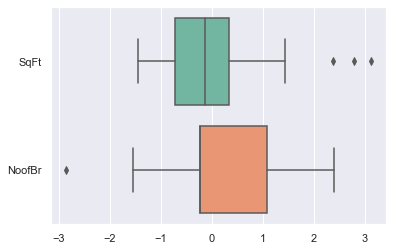

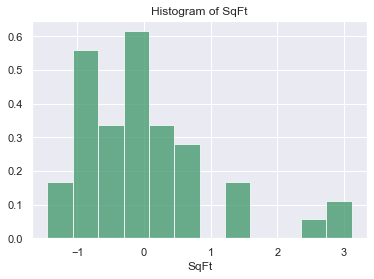

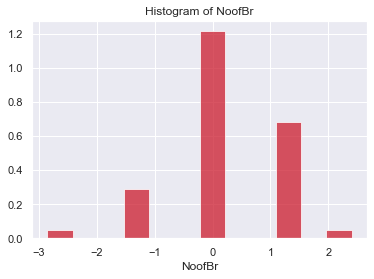

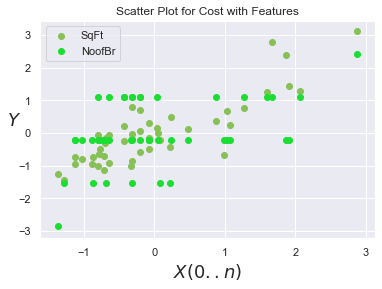

Features Correlation with Target :
SqFt      0.854988
NoofBr    0.442261
Cost      1.000000
Name: Cost, dtype: float64
Heat Map
Pair Plot showing the correlation of Index(['SqFt', 'NoofBr'], dtype='object') to the target Cost


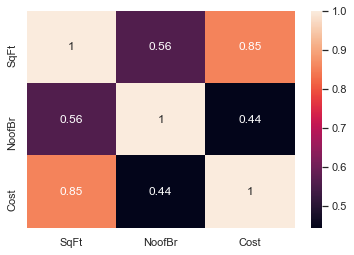

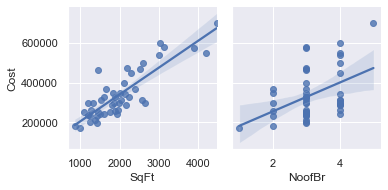

In [6]:
#Initialize EDA Object
print_line(True)
print("Exploratory Data Analysis".center(80, ' '))
print_line(True)
eda = EDA(True, True, True, True, True, True)
eda.describe('MultipleVariables.txt', 'Cost')

#### Analysis

Data set provided has no Null values and with a minimal outliers in them. All of the features provided are seems to be continuous in nature by the fact that they are all real numbers

##### Outliers
   > SQFt : Outliers being present and Q3 being the largest and varies more

##### Correlation 

   > SQFt seems to be correlated more, even the same has been evaluated by using the pairplot between above.
   

### GD vs MBGD vs SGD - Inclusive of all data

\begin{aligned}
        J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2,
        \end{aligned}
        


\begin{aligned}
        \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}-y^{(i)})x^{(i)}
\end{aligned}
        


#### Gradient Descent
Vanilla implementation of the algorithm with the help of Numpy and Pandas
1. Create an object of BGDRegression 
> **gd = BGDRegression(iterations=100, scale=True, verbose=True)**

2. Call generate_model with training set data
> **gd.generate_model(np.matrix(X), np.matrix(y))**

3. call predict method to get the y^ for the provided X(features)
> **y^ = gd.predict(np.insert(np.matrix(X), 0, 1, axis=1)))**

#### Mini Batch Gradient Descent
Extends Gradient Descent and inlcudes batching concept

1. Create and Object of MBGDRegression, rest of the other calls similar to the above as we inherited those features from the parent class i.e. BGDRegression
> **mb = MBGDRegression(iterations=10, batch_size=50, alpha=0.05, scale=True, verbose=True)**

#### Stochastic Gradient Descent
Extends Gradient Descent and includes random sampling concept
1. Create and Object of SGDRegression, rest of the other calls similar to the above as we inherited those features from the parent class i.e. BGDRegression

> **sgd = SGDRegression(iterations=100, scale=True, verbose=True)**

                Multiple Linear Regression with Gradient Descent                
                      Plotting Cost Function vs Iterations                      


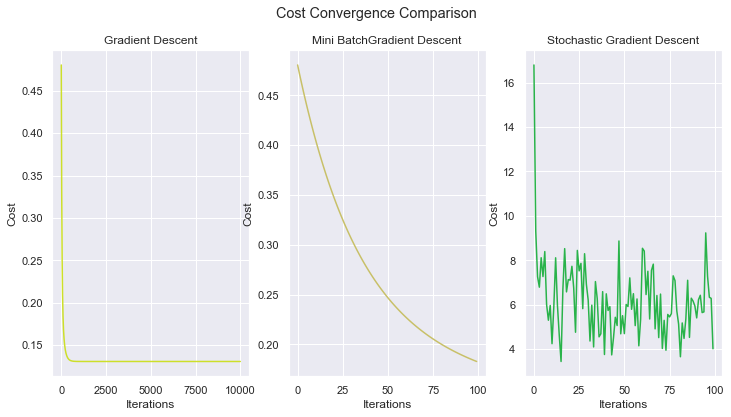

In [7]:
# Load the Bag Data into the dataframe
bagdata = pd.read_csv(r'MultipleVariables.txt')

'''
Normalize the Data 
[
To Avoid Overflow Errors :overflow encountered in power
]
'''
bagdata = eda.scale_data(bagdata)

# Read Target Column [Cost]; where MV stands for multivariate
mv_y = bagdata.iloc[:, (bagdata.shape[1] - 1) :(bagdata.shape[1])]

# Read Feature Columns and add 1 to the X0 feature column
mv_x = np.c_[np.ones(bagdata.shape[0]), bagdata.iloc[:, 0:(bagdata.shape[1] - 1)]]

print_line(True)
print("Multiple Linear Regression with Gradient Descent".center(80, ' '))
print_line(True)

# Initialize the Regression for all three different
bd = BGDRegression(iterations=10000,alpha=0.01, scale=True, verbose=True)
# Initiating with a batch size of 50
mb = MBGDRegression(iterations=100, batch_size=50,
                    alpha=0.01, scale=True, verbose=True)

# Custom Implementation of SGD
sgd = SGDRegression(iterations=100, alpha=0.01, scale=True, verbose=True)

bd.generate_model(np.matrix(mv_x), np.matrix(mv_y))
mb.generate_model(np.matrix(mv_x), np.matrix(mv_y))
sgd.generate_model(np.matrix(mv_x), np.matrix(mv_y))


# Trying to add all the cost function comparison into the subplot
# to help visualize better on the convergence

print('Plotting Cost Function vs Iterations'.center(80, ' '))
print_line(True)
plt.rcParams["figure.figsize"] = (12, 6)

fig, (gd_p, mbgd_p, sgd_p) = plt.subplots(1, 3)
fig.suptitle('Cost Convergence Comparison')

gd_p.plot(range(len(bd._cost_history)), bd._cost_history, color=get_color())
gd_p.set_title('Gradient Descent')
gd_p.set(xlabel='Iterations', ylabel='Cost')


mbgd_p.plot(range(len(mb._cost_history)), mb._cost_history, color=get_color())
mbgd_p.set_title('Mini BatchGradient Descent')
mbgd_p.set(xlabel='Iterations', ylabel='Cost')

sgd_p.plot(range(len(sgd._cost_history)), sgd._cost_history, color=get_color())
sgd_p.set_title('Stochastic Gradient Descent')
sgd_p.set(xlabel='Iterations', ylabel='Cost')

plt.show()

In [8]:
outcome = []
# R squared, RMSE and MSE mv_y, linear_regression_model.predict(mv_x)
bg_mse = bd.mse(mv_x, mv_y)
outcome.append(['Gradient Descent', r2_score(
    mv_y, bd.predict(mv_x)), bg_mse, np.sqrt(bg_mse), bd._iterations, bd._alpha])

mb_mse = mb.mse(mv_x, mv_y)
outcome.append(['Mini Gradient Descent', r2_score(
    mv_y, mb.predict(mv_x)), mb_mse, np.sqrt(mb_mse), mb._iterations, mb._alpha])

sgd_mse = sgd.mse(mv_x, mv_y)
outcome.append(['Stochastic Gradient Descent', r2_score(
    mv_y, sgd.predict(mv_x)), sgd_mse, np.sqrt(sgd_mse), sgd._iterations, sgd._alpha])

ec_metrics = pd.DataFrame(
    outcome, columns=['GD Variant', 'R^2', 'MSE', 'RMSE', 'Iterations', 'Learning Rate'])

ec_metrics.head()

,GD Variant,R^2,MSE,RMSE,Iterations,Learning Rate
0,Gradient Descent,0.732945,Cost 0.130686 dtype: float64,Cost 0.361506 dtype: float64,10000,0.01
1,Mini Gradient Descent,0.626439,Cost 0.182807 dtype: float64,Cost 0.427559 dtype: float64,100,0.01
2,Stochastic Gradient Descent,0.727352,Cost 0.133423 dtype: float64,Cost 0.365272 dtype: float64,100,0.01


[ 0 13]
After Outlier Removal BagSize rows 46, cols 3 
                Multiple Linear Regression with Gradient Descent                
                      Plotting Cost Function vs Iterations                      


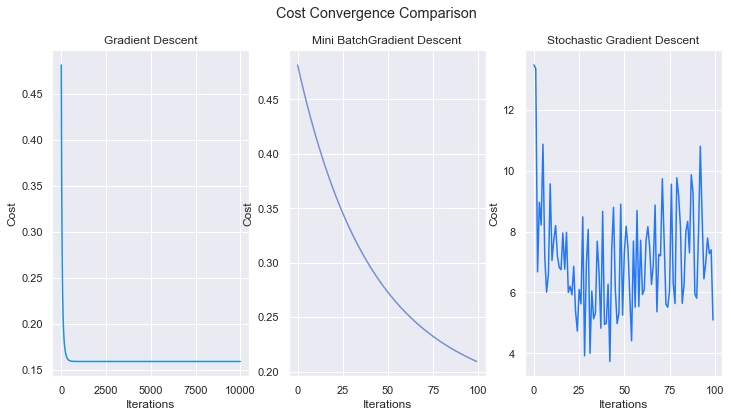

In [13]:
# Load the Bag Data into the dataframe
bagdata = pd.read_csv(r'MultipleVariables.txt')

# Using z Score to remove the outliers
z = np.abs(stats.zscore(bagdata))
print_line(True)
print(np.unique(np.where(z > 3)))
row, col = bagdata.shape
bagdata = bagdata[(z < 3).all(axis=1)]
print('After Outlier Removal BagSize rows {}, cols {} '.format(
    bagdata.shape[0], bagdata.shape[1]))
print_line(True)
bagdata = eda.scale_data(bagdata)


# Read Target Column [Cost]; where MV stands for multivariate
mv_y = bagdata.iloc[:, (bagdata.shape[1] - 1):(bagdata.shape[1])]

# Read Feature Columns and add 1 to the X0 feature column
mv_x = np.c_[np.ones(bagdata.shape[0]),
             bagdata.iloc[:, 0:(bagdata.shape[1] - 1)]]

print_line(True)
print("Multiple Linear Regression with Gradient Descent".center(80, ' '))
print_line(True)

# Initialize the Regression for all three different
bd = BGDRegression(iterations=10000, alpha=0.01, scale=True, verbose=True)
# Initiating with a batch size of 50
mb = MBGDRegression(iterations=100, batch_size=50,
                    alpha=0.01, scale=True, verbose=True)

# Custom Implementation of SGD
sgd = SGDRegression(iterations=100, alpha=0.01, scale=True, verbose=True)

bd.generate_model(np.matrix(mv_x), np.matrix(mv_y))
mb.generate_model(np.matrix(mv_x), np.matrix(mv_y))
sgd.generate_model(np.matrix(mv_x), np.matrix(mv_y))


# Trying to add all the cost function comparison into the subplot
# to help visualize better on the convergence

print('Plotting Cost Function vs Iterations'.center(80, ' '))
print_line(True)
plt.rcParams["figure.figsize"] = (12, 6)

fig, (gd_p, mbgd_p, sgd_p) = plt.subplots(1, 3)
fig.suptitle('Cost Convergence Comparison')

gd_p.plot(range(len(bd._cost_history)), bd._cost_history, color=get_color())
gd_p.set_title('Gradient Descent')
gd_p.set(xlabel='Iterations', ylabel='Cost')


mbgd_p.plot(range(len(mb._cost_history)), mb._cost_history, color=get_color())
mbgd_p.set_title('Mini BatchGradient Descent')
mbgd_p.set(xlabel='Iterations', ylabel='Cost')

sgd_p.plot(range(len(sgd._cost_history)), sgd._cost_history, color=get_color())
sgd_p.set_title('Stochastic Gradient Descent')
sgd_p.set(xlabel='Iterations', ylabel='Cost')

plt.show()